## Uniform Cost Search 

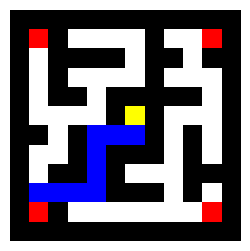

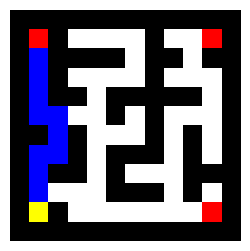

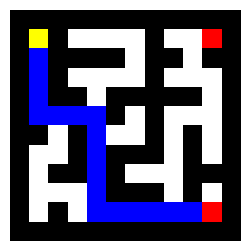

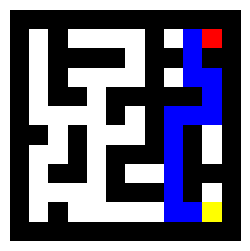

54

In [14]:
from maze_visualizer import *
import heapq

def ucs_search_to_corner(grid, start, goal):
    frontier = []  # Priority queue
    heapq.heappush(frontier, (0, start))  # (cost, position)
    came_from = {start: None}  # Track the path
    cost_so_far = {start: 0}  # Track the cost to reach a node

    while frontier:
        current_cost, current_position = heapq.heappop(frontier)

        # Goal check
        if current_position == goal:
            break

        for next_position in neighbors(grid, current_position):
            new_cost = current_cost + 1  # Assuming uniform cost
            if next_position not in cost_so_far or new_cost < cost_so_far[next_position]:
                cost_so_far[next_position] = new_cost
                priority = new_cost
                heapq.heappush(frontier, (priority, next_position))
                came_from[next_position] = current_position

    # Reconstruct and return the path
    return reconstruct_path(came_from, start, goal)

def reconstruct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()  # Reverse the path to start->goal
    return path

def neighbors(grid, cell):
    # This function should return a list of valid neighbor positions for a cell in the grid
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    result = []
    for dx, dy in directions:
        nx, ny = cell[0] + dx, cell[1] + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
            result.append((nx, ny))
    return result


def ucs_search_all_corners(grid, start):
    # Define the four corners of the maze
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    visited_corners = set()
    current_position = start
    paths_to_corners = []
    
    while len(visited_corners) < len(corners):
        # Initialize variables for finding the closest corner
        closest_corner = None
        shortest_path_to_corner = None
        
        for corner in corners:
            if corner not in visited_corners:
                path_to_corner = ucs_search_to_corner(grid, current_position, corner)
                # Check if this is the shortest path so far
                if shortest_path_to_corner is None or len(path_to_corner) < len(shortest_path_to_corner):
                    closest_corner = corner
                    shortest_path_to_corner = path_to_corner
        
        if closest_corner:
            visited_corners.add(closest_corner)
            # Append the path to the specific corner
            paths_to_corners.append(shortest_path_to_corner)
            current_position = closest_corner

    return paths_to_corners

# Use the modified function to find paths to all corners
start = (5, 6)  # Define the starting position
all_corners_paths = ucs_search_all_corners(sample_maze, start)

show_solution(sample_maze, start, all_corners_paths)
count_steps(all_corners_paths)

## Greedy Search

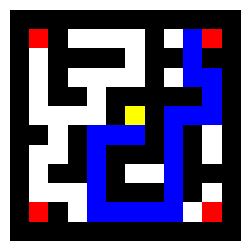

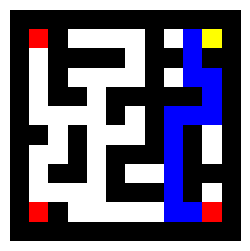

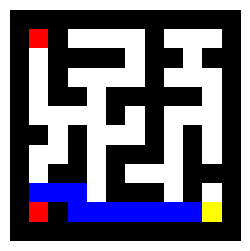

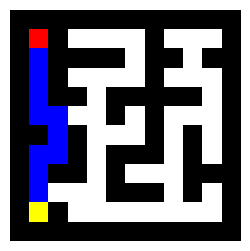

61

In [15]:

def heuristic_cost_estimate(point, corners):
    # If corners is a single tuple, convert it to a list with one tuple
    if isinstance(corners, tuple):
        corners = [corners]
        
    # Calculate the Manhattan distance from the point to the closest unvisited corner
    closest_corner = min(corners, key=lambda x: abs(point[0] - x[0]) + abs(point[1] - x[1]))
    return abs(point[0] - closest_corner[0]) + abs(point[1] - closest_corner[1])


def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def neighbors(grid, cell):
    neighbors = []
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 1:
            neighbors.append((x, y))
    return neighbors

def greedy_best_first_search(grid, start):
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    unvisited_corners = set(corners)
    path = []
    visited = set()

    while unvisited_corners:
        closest_corner = min(unvisited_corners, key=lambda x: heuristic_cost_estimate(start, x))
        goal = closest_corner

        open_set = []
        heapq.heappush(open_set, (heuristic_cost_estimate(start, goal), start))
        came_from = {}
        visited.clear()

        while open_set:
            current_heuristic, current = heapq.heappop(open_set)

            if current == goal:
                path.append(reconstruct_path(came_from, current))
                start = current  # Update start to last goal for the next iteration
                unvisited_corners.remove(goal)  # Remove reached corner from the goals
                break  # Exit the loop since goal is reached

            visited.add(current)

            for neighbor in neighbors(grid, current):
                if neighbor in visited:
                    continue  # Skip visited neighbors
                
                if neighbor not in came_from:
                    came_from[neighbor] = current
                    heapq.heappush(open_set, (heuristic_cost_estimate(neighbor, goal), neighbor))

            if not open_set:  # If open_set is empty, goal is not reachable
                print(f"Goal {goal} is not reachable from {start}. Moving to the next goal.")
                unvisited_corners.remove(goal)  # Remove the unreachable goal
                break  # Break out of the loop to try the next goal

    return path


    
path = greedy_best_first_search(sample_maze,(5,6))
show_solution(sample_maze,(5,6),path)
count_steps(path)